<a href="https://colab.research.google.com/github/pareshrchaudhary/numericalmethods/blob/main/Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Complexity

**The effort required for a computer to run a program to completion given the size of input.**  

How does your program scale?

The most promising way to gauge the performance of the program is to count all the fundamental operations like additions, subtractions, multiplications, divisions, assignments, and function calls in the the program. These fundamental oprations are common in all the the computers so the measurement of efficiency can be replicated everywhere.

Let's calculate the operations in the function below-

_This is a special function that uses hardcoded values to return the total number of operations after the function executes to completion._

In [25]:
def f(n):
  """
  f(n) = 2*n^2 + 4*n + 3

  n^2 terms -> 2*n^2 (the run time of double for loops)
  n terms -> 4*n
  constant terms -> 3

  return count of all the terms
  """
  counter1 = 0
  counter2 = 0
  counter3 = 3  # constant time

  for i in range(n):
    for j in range(n):
      counter1 += 2  # assignment & addition n^2 times

  for k in range(n):
    counter2 += 1*2   # assignment & multiplication n times

  for l in range(n):
    counter2 += 1*2   # assignment & multiplication n times

  return counter1, counter2, counter3

In [45]:
import numpy as np

total_list = np.zeros([5, 4])
term1, term2, term3 = 0

for i in range(0, 5):
    term1, term2, term3 = f(i)
    total = term1 + term2 + term3
    print("Input n = {} --> Total = {}".format(i, total))
    total_list[i] = total, term1, term2, term3

Input n = 0 --> Total = 3 (n^2 = 0.0%, n = 0.0%, constant = 100.0%)
Input n = 1 --> Total = 9 (n^2 = 22.222%, n = 44.444%, constant = 33.333%)
Input n = 2 --> Total = 19 (n^2 = 42.105%, n = 42.105%, constant = 15.789%)
Input n = 3 --> Total = 33 (n^2 = 54.545%, n = 36.364%, constant = 9.0909%)
Input n = 4 --> Total = 51 (n^2 = 62.745%, n = 31.373%, constant = 5.8824%)


In the example function above we have calculated the total number of operations across different $n$ values. Here it can be seen with increasing $n$ the proportion of

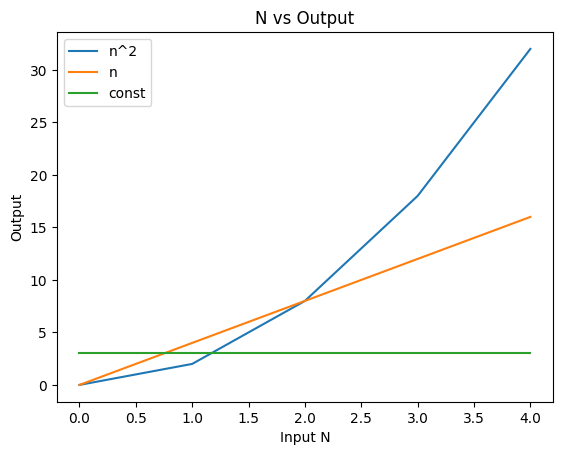

In [47]:
import matplotlib.pyplot as plt

x = range(0, 5)

plt.plot(x, total_list[:,1], label='n^2')
plt.plot(x, total_list[:,2], label='n')
plt.plot(x, total_list[:,3], label='const')

plt.xlabel('Input N')
plt.ylabel('Output')
plt.title('N vs Output')
plt.legend()
plt.show()

In [105]:
n = np.arange(0, 101, 10)
total_list = np.zeros([11, 4])

for i in n:
  term1, term2, term3 = f(i)
  total = term1 + term2 + term3
  print("Input n = {} --> Total = {} (n^2 = {:.0005}%, n = {:.0005}%, constant = {:.05}%)".format(i, total, (term1/total)*100, (term2/total)*100, (term3/total)*100))
  total_list[i//10,:] = total, term1, term2, term3

Input n = 0 --> Total = 3 (n^2 = 0.0%, n = 0.0%, constant = 100.0%)
Input n = 10 --> Total = 243 (n^2 = 82.305%, n = 16.461%, constant = 1.2346%)
Input n = 20 --> Total = 883 (n^2 = 90.6%, n = 9.06%, constant = 0.33975%)
Input n = 30 --> Total = 1923 (n^2 = 93.604%, n = 6.2402%, constant = 0.15601%)
Input n = 40 --> Total = 3363 (n^2 = 95.153%, n = 4.7577%, constant = 0.089206%)
Input n = 50 --> Total = 5203 (n^2 = 96.098%, n = 3.8439%, constant = 0.057659%)
Input n = 60 --> Total = 7443 (n^2 = 96.735%, n = 3.2245%, constant = 0.040306%)
Input n = 70 --> Total = 10083 (n^2 = 97.193%, n = 2.777%, constant = 0.029753%)
Input n = 80 --> Total = 13123 (n^2 = 97.539%, n = 2.4385%, constant = 0.022861%)
Input n = 90 --> Total = 16563 (n^2 = 97.808%, n = 2.1735%, constant = 0.018113%)
Input n = 100 --> Total = 20403 (n^2 = 98.025%, n = 1.9605%, constant = 0.014704%)


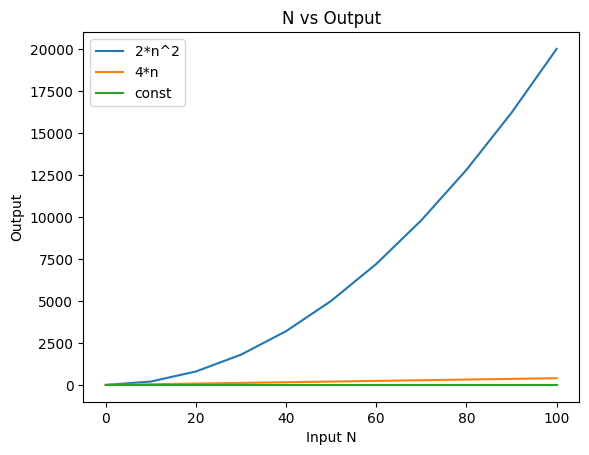

In [109]:
x = np.arange(0, 101, 10)

plt.plot(x, total_list[:,1], label='2*n^2')
plt.plot(x, total_list[:,2], label='4*n')
plt.plot(x, total_list[:,3], label='const')

plt.xlabel('Input N')
plt.ylabel('Output')
plt.title('N vs Output')
plt.legend()
plt.show()